In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
plt.style.use(['science','notebook','grid'])
import sympy as sp
import random

from IPython.core.display import Latex
from sympy import *
    

def lprint(*args,**kwargs):
    """Pretty print arguments as LaTeX using IPython display system 
    
    Parameters
    ----------
    args : tuple 
        What to print (in LaTeX math mode)
    kwargs : dict 
        optional keywords to pass to `display` 
    """
    display(Latex('$$'+' '.join(args)+'$$'),**kwargs)

# Problem 1

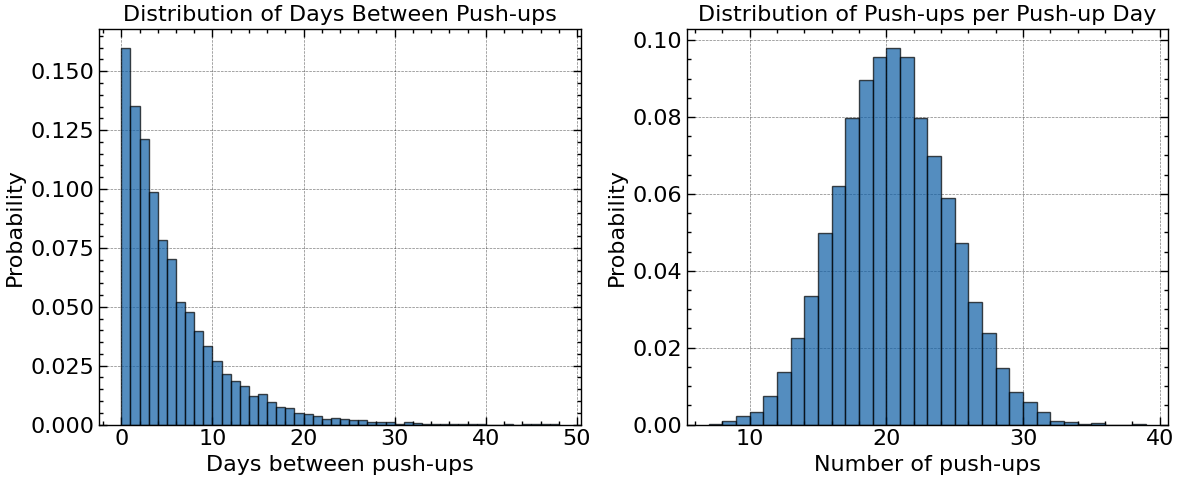

Average days between push-ups: 5.0629
Average push-ups per push-up day: 19.9975


In [31]:
num_experiments = 10
num_trials = 1
count_experiment = []

for experiment in range(num_experiments):
    count = 0

    for trial in range(num_trials):
        if random.randint(1,6) == 6:
            count += 1
    count_experiment.append(count)

# Problem 2

### Problem 2.1

In [3]:
mu_r_earth   =  149*10e-06
sig_r_earth  =  3*10e-06
mu_r_sun     =  25*10e-06
sig_r_sun    =  5*10e-06
mu_r_comet   =  309*10e-06
sig_r_comet  =  20*10e-06

In [4]:
# Define variables:
f, r_earth,r_sun,r_comet = symbols("f, r_e, r_s, r_C")
df,dr_earth,dr_sun,dr_comet = symbols("sigma_f, sigma_e, sigma_s, sigma_c")

f = (r_earth - r_comet)/(r_sun - r_comet)
lprint(latex(Eq(symbols('f'),f)))

# Calculate uncertainty and print:
df = sqrt((f.diff(r_earth) * dr_earth)**2 + (f.diff(r_sun) * dr_sun)**2 + (f.diff(r_comet) * dr_comet)**2)
lprint(latex(Eq(symbols('sigma_f'), df)))

# Turn expression into numerical functions 
ff = lambdify((r_earth,r_sun, r_comet),f)
fdf = lambdify((r_earth,dr_earth,r_sun,dr_sun,r_comet, dr_comet),df)

# Numerically evaluate expressions and print 
vf = ff(mu_r_earth,mu_r_sun,mu_r_comet)
vdf = fdf(mu_r_earth,sig_r_earth,mu_r_sun,sig_r_sun,mu_r_comet,sig_r_comet)
lprint(fr'f = {vf:.2f} \pm {vdf:.2f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Problem 2.2

In [5]:
mu_N   =  1971
sig_N  =  np.sqrt(1971)
mu_t   =  98.4
sig_t  =  3.7

In [6]:
# Define variables:
r, N, t = symbols("r, N, t")
dr, dN, dt = symbols("sigma_r, sigma_N, sigma_t")

r = N/t
lprint(latex(Eq(symbols('r'),r)))

dr= sqrt((r.diff(N) * dN)**2 + (r.diff(t) * dt)**2)
lprint(latex(Eq(symbols('sigma_r'), dr)))

fr = lambdify((N, t),r, 'numpy')
fdr = lambdify((N, dN, t, dt),dr, 'numpy')

vr = fr(mu_N, mu_t)
vdr = fdr(mu_N, sig_N, mu_t, sig_t)
lprint(fr'r = {vr:.1f} \pm {vdr:.1f}')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>